In [82]:
#importing modules
import numpy as np
import random
from matplotlib import pyplot as plt

In [83]:
#Initial Population
N0 = np.array([200, 200, 200])
##These are projection matrices/transition matrices. 
A = np.array([[ 0, 0 ,1.73], [ 0.5, 0.95 ,0.6], [ 0.03, 0.03 ,0.38]])#Good year (More rain)
B = np.array([[ 0, 0 ,1.73], [ 0.5, 0.875 ,0.6], [ 0.03, 0.03 ,0.38]])#Bad year (Less rain)
years = 50

class superclass:
    def __init__(self, A, B, N0, years):
        """It stores information about initial population, transition matrices and time period"""
        self.A = A
        self.B = B
        self.N0 = N0
        self.years = years
              
    def bootstrap(self, A, B, N0, years):
        N= np.zeros((51,3)) #build a storage array that stores the population of each stage in every year
        N[0,] = N0 #Fill in the year 0 with initial population 
        simulations = 1000 #no of simulations
        pop_size=np.zeros((1000,1))
        extinction= np.zeros((51,1000)) 
        list1 = ("bad", "good") 
        for j in range(simulations): #loop through the simulations
            #a stochastic program where each transition-good or bad-is equally likely
            for i in range(years): #loop through good/bad transition matrix
                random_year=random.choice(list1) 
                if random_year=="bad":
                    mat=B
                if random_year=="good":
                    mat=A
                #Update the population using matrix multiplication of transition matrix and previous year abundance 
                #to get this year abundance
                N[i+1,] = mat.dot(N[i,])
                #let, the quasi-extinction level is 100
                #if the population size is less than 100, population will go extinct and 
                #if it is more than 100 it does not go extinct
                if sum(N[i+1,])>100: 
                    extinction[i,j]=0
                if sum(N[i+1,])<=100:
                    extinction[i,j]=1
                pop_size[j,:]=sum(N[i,])
            
        return pop_size
        

In [84]:
pop = superclass(A, B, N0, years)
pop_size = pop.bootstrap(A, B, N0, years)

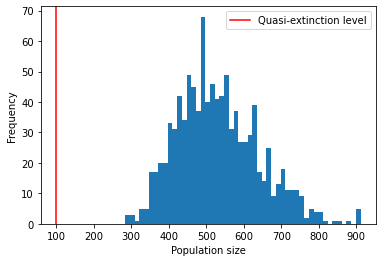

In [85]:
#plot a histogram
plt.hist(pop_size,50)
plt.axvline(x = 100, color = 'r', label = 'Quasi-extinction level')
plt.xlabel('Population size')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.savefig("popsizeplot.jpg", dpi=900)
plt.show()


Conclusion: Since the quasi-extinction level (100) is less than the lowest extinction level, it can be said that population is not on the verge of extinction, regardless of it being a year with more rain or less rain.